In [6]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns
import random
%pip install opencv-python
import cv2
%pip install tqdm
from tqdm import tqdm_notebook
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,Conv2DTranspose,UpSampling2D, add, LeakyReLU, Input
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [9]:
def get_all_images_path(data_dir):
    
    categories = os.listdir(data_dir)

    train, test = [], []

    for category in categories:
        classes = os.listdir(os.path.join(data_dir, category))
        
        for Cls in classes:
            path = os.path.join(os.path.join(data_dir, category), Cls)
            
            for img in os.listdir(path):
                img_path = os.path.join(path, img)
                if category == 'train' or category == 'validation':
                    train.append(img_path)
                elif category == 'test':
                    test.append(img_path)
                else:
                    print('Unknown category !')
                    
    else:
        random.shuffle(train)
        random.shuffle(test)
        
        return train, test
                
        
data_dir = 'Dataset for CA1 part A - AY2425S1' # The direction of dataset
train, test = get_all_images_path(data_dir)

train[:10:3], len(train)

(['Dataset for CA1 part A - AY2425S1\\train\\Tomato\\0548.jpg',
  'Dataset for CA1 part A - AY2425S1\\validation\\Bitter_Gourd\\1141.jpg',
  'Dataset for CA1 part A - AY2425S1\\train\\Cucumber\\0213.jpg',
  'Dataset for CA1 part A - AY2425S1\\train\\Bean\\1265.jpg'],
 12043)

In [10]:
def preprocess_image(paths):
    images = []
    pbar = tqdm_notebook(total=len(paths), position=0, leave=True, colour='green')
    for i in paths:
        img = load_img(i, target_size=(160, 160))
        img = img_to_array(img)
        img = np.expand_dims(img, axis=0)
        images.append(img)
        
        pbar.update(1)
        
    pbar.close()
    
    images = np.array(images)
    images = images.astype('float32')/255
    images = images.reshape(len(paths), 160, 160, 3)
    
    return images

train_original, test_original = preprocess_image(train), preprocess_image(test)

train_original.shape


  0%|          | 0/12043 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

(12043, 160, 160, 3)

In [11]:
def convert_to_grayscale(images):
    gray_images = []
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray_images.append(gray)
        
    gray_images = np.array(gray_images)
    gray_images = gray_images.reshape(-1,160,160,1)
    return gray_images

# Convert training and testing images to grayscale
train_gray = convert_to_grayscale(train_original)
test_gray = convert_to_grayscale(test_original)

train_gray.shape

(12043, 160, 160, 1)

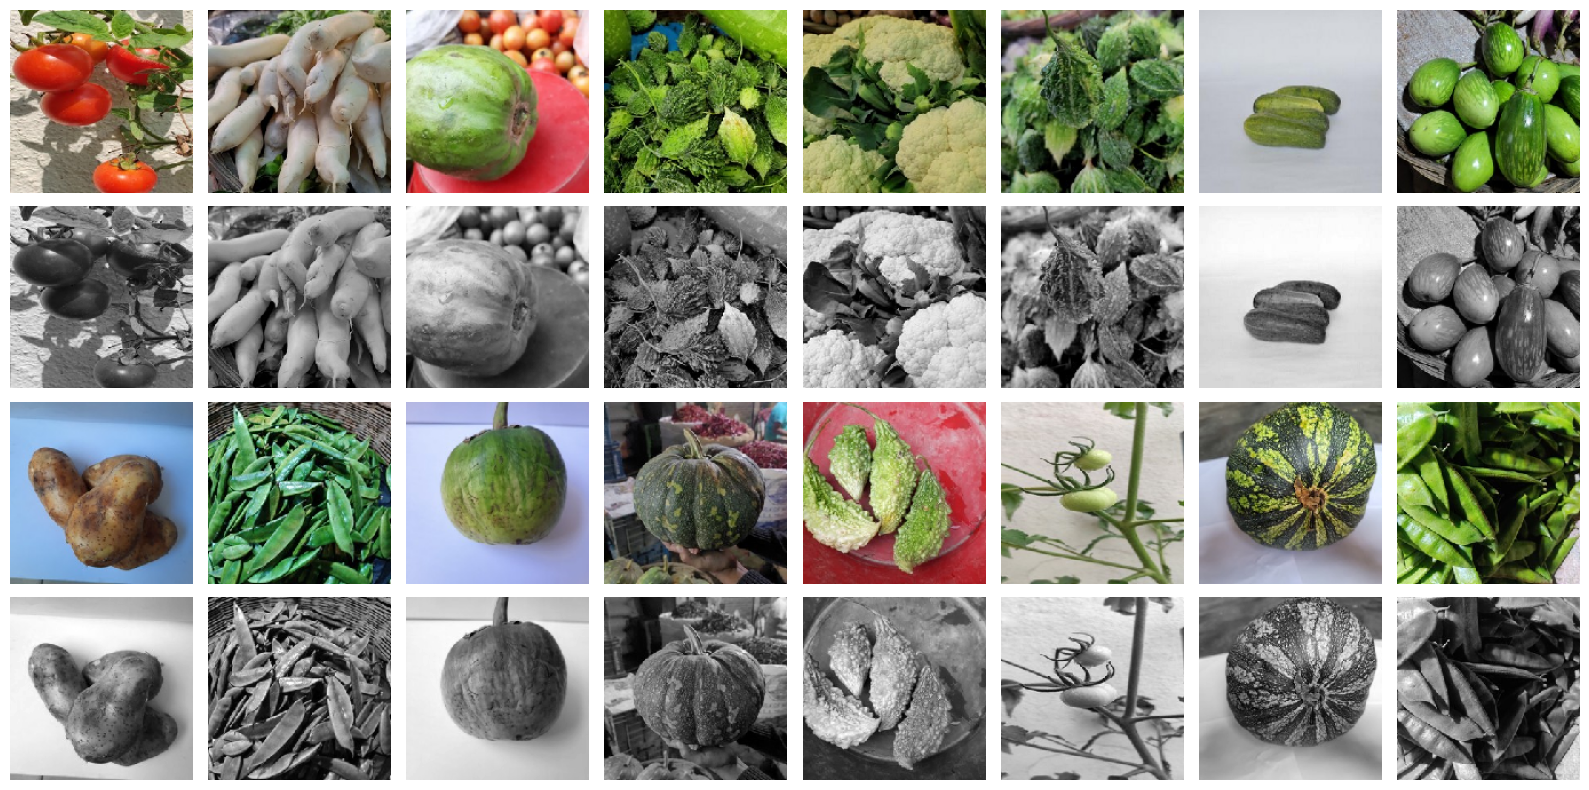

In [12]:
rows = 2 # defining number of rows in figure
cols = 8 # defining number of colums in figure

f = plt.figure(figsize=(2*cols,2*rows*2))

for i in range(rows):
    for j in range(cols):
        f.add_subplot(rows*2,cols,(2*i*cols)+(j+1))
        plt.imshow(train_original[i*cols + j] )
        plt.axis("off")

    for j in range(cols):
        f.add_subplot(rows*2,cols,((2*i+1)*cols) +(j+1))
        plt.imshow(train_gray[i*cols + j] , cmap = 'gray')
        plt.axis("off")

plt.tight_layout()
plt.show()